In [4]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train'
valid_path = 'chest_xray/test'


In [7]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 9s 0us/step


In [8]:
for layer in vgg.layers:
    layer.trainable = False

In [25]:
folders = glob('chest_xray/train/*')

In [26]:
x = Flatten()(vgg.output)

In [27]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [29]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
train= train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [32]:
test = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [35]:
r = model.fit_generator(
  train,
  validation_data=test,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 1738s 11s/step - loss: 0.1352 - accuracy: 0.9515 - val_loss: 0.3047 - val_accuracy: 0.9071
Epoch 2/5
163/163 [==============================] - 1584s 10s/step - loss: 0.1006 - accuracy: 0.9609 - val_loss: 0.3198 - val_accuracy: 0.9054
Epoch 3/5
163/163 [==============================] - 1684s 10s/step - loss: 0.0982 - accuracy: 0.9613 - val_loss: 0.2883 - val_accuracy: 0.9135
Epoch 4/5
163/163 [==============================] - 1811s 11s/step - loss: 0.0753 - accuracy: 0.9724 - val_loss: 0.3813 - val_accuracy: 0.8990
Epoch 5/5
163/163 [==============================] - 1855s 11s/step - loss: 0.0771 - accuracy: 0.9714 - val_loss: 0.3549 - val_accuracy: 0.8990


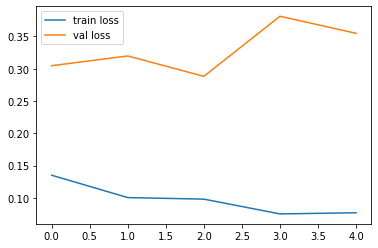

<Figure size 432x288 with 0 Axes>

In [41]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [37]:
import tensorflow as tf

from keras.models import load_model

model.save('pneumonia_model.h5')

In [6]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
model=load_model('pneumonia_model.h5')

In [28]:
img=image.load_img('./chest_xray/train/PNEUMONIA/person2_bacteria_4.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)

In [29]:
int(classes[0][1])

1